In [9]:
#환자의 치료 전과 후를 비교하여 효과성을 평가하는 코드 실습
#데이터 -> 램덤 더미 데이터

import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

#### 치료 전, 후 데이터 랜덤하게 생성

In [10]:
pre_treatment = np.random.randint(1, 10, size=20)
post_treatment = np.random.randint(-3,4, size=20)

#데이터 프레임
data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})

print(data)
data.to_csv("./data/treatment_data.csv", index=False, encoding='utf-8')

    pre_treatment  post_treatment
0               2               0
1               7              -3
2               7               0
3               8              -1
4               3               1
5               8              -2
6               5               1
7               1              -1
8               5              -3
9               6               3
10              5               3
11              1               0
12              4              -1
13              3               1
14              6               1
15              6               3
16              7              -2
17              4               0
18              4              -2
19              6               2


### 환자의 치료전과 후를 비교하여 효과성 평가

In [11]:
# data 가져오기
treatment_data = pd.read_csv("./data/treatment_data.csv")
#print(treatment_data)

#윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])

print(stat, p)

0.0 1.9073486328125e-06


In [12]:
if p > 0.05 :
    print("fail to reject HO")
else : 
    print()

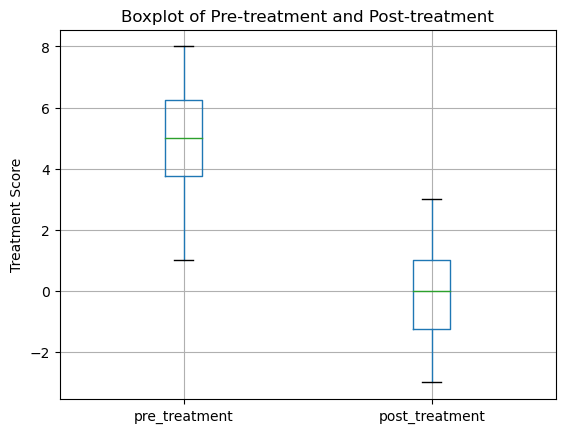

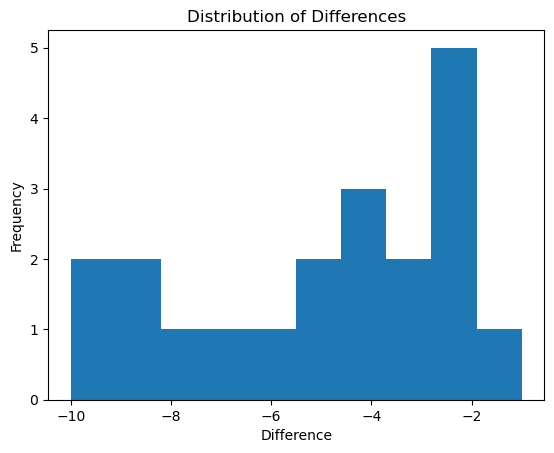

In [13]:
import matplotlib.pyplot as plt

# boxplot 그리기
fig, ax = plt.subplots()
data.boxplot(['pre_treatment', 'post_treatment'], ax=ax)
ax.set_title('Boxplot of Pre-treatment and Post-treatment')
ax.set_ylabel('Treatment Score')
plt.show()

# 두 변수의 차이에 대한 분포를 시각화
fig, ax = plt.subplots()
data['diff'] = data['post_treatment'] - data['pre_treatment']
ax.hist(data['diff'], bins=10)
ax.set_title('Distribution of Differences')
ax.set_xlabel('Difference')
ax.set_ylabel('Frequency')
plt.show()